## Muhamad Fadhli Akbar(Cortana)

### Assignment Machine Learning 01 About K-Nearest Neighbors(KKN)

If **file code & images** cannot be accessed, you can use the repository link which can be accessed by using [this link!](https://github.com/Cortana-Coders/AICI-Tasks/blob/main/Assigment-Machine-Learning/Muhamad%20Fadhli%20Akbar-Cortana-ML%2001.ipynb "link github")

Create a KNN algorithm with sklearn to predict diabetes using Indian diabetes data. Find the distance metrics and K values ​​to obtain the best performance or accuracy.

Notes:

- Pengecekan performa bisa menggunakan metrics accuracy pada sklearn
- Nama kolom

column = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

Create a KNN algorithm with sklearn to predict diabetes using Indian diabetes data. Find the distance metrics and K values ​​to obtain the best performance or accuracy.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

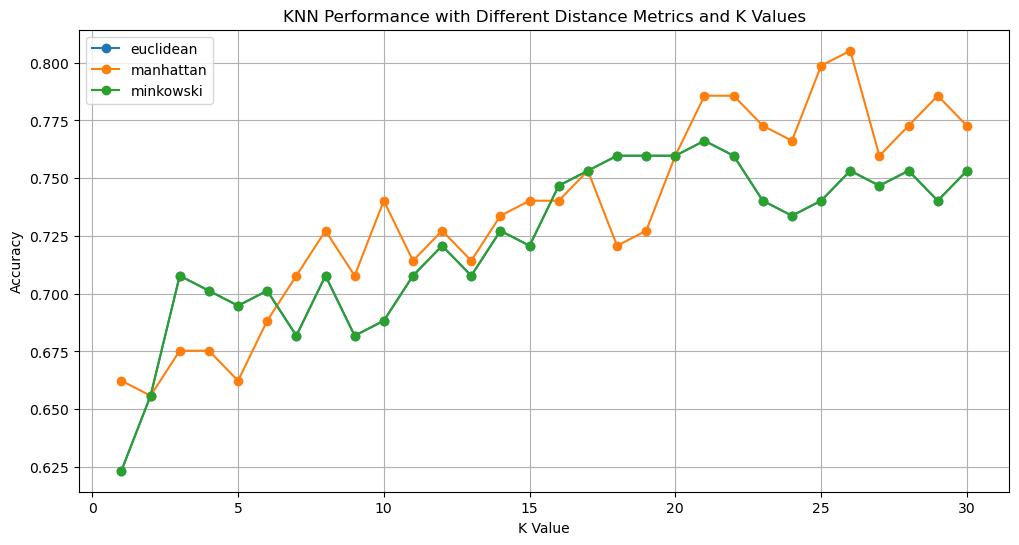


Best Performance:
Distance Metric: manhattan
K Value: 26
Accuracy: 0.8052

Final Model Performance:
Training Accuracy: 0.7752
Testing Accuracy: 0.8052


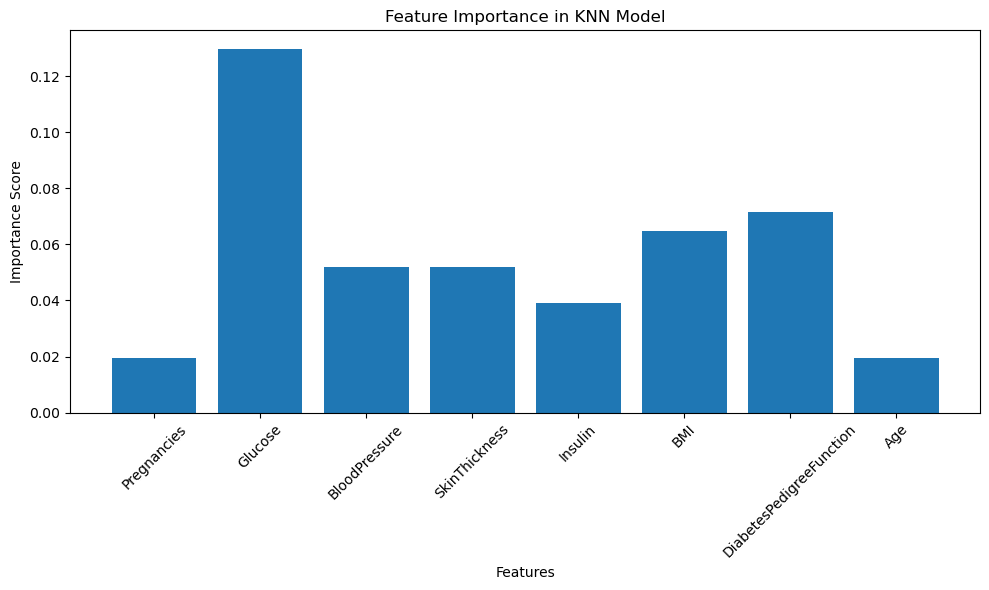

In [2]:
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv('indians-diabetes-data.csv', names=column_names)

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Distance metrics to try
metrics = ['euclidean', 'manhattan', 'minkowski']
k_values = range(1, 31)

# Dictionary to store results
results = {}

# Test different metrics and K values
for metric in metrics:
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    results[metric] = accuracies

# Plot results
plt.figure(figsize=(12, 6))
for metric, accuracies in results.items():
    plt.plot(k_values, accuracies, marker='o', label=metric)

plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Performance with Different Distance Metrics and K Values')
plt.legend()
plt.grid(True)
plt.show()

# Find best combination
best_accuracy = 0
best_k = 0
best_metric = ''

for metric, accuracies in results.items():
    max_acc = max(accuracies)
    if max_acc > best_accuracy:
        best_accuracy = max_acc
        best_k = k_values[accuracies.index(max_acc)]
        best_metric = metric

print(f"\nBest Performance:")
print(f"Distance Metric: {best_metric}")
print(f"K Value: {best_k}")
print(f"Accuracy: {best_accuracy:.4f}")

# Train final model with best parameters
best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_model.fit(X_train_scaled, y_train)

# Final evaluation
train_accuracy = best_model.score(X_train_scaled, y_train)
test_accuracy = best_model.score(X_test_scaled, y_test)

print(f"\nFinal Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Feature importance analysis
def knn_feature_importance(model, X, y):
    importances = []
    baseline_accuracy = model.score(X, y)
    
    for i in range(X.shape[1]):
        X_temp = X.copy()
        X_temp[:, i] = np.mean(X[:, i])  # Replace feature with its mean
        accuracy_without_feature = model.score(X_temp, y)
        importance = baseline_accuracy - accuracy_without_feature
        importances.append(importance)
    
    return importances

# Calculate feature importance
feature_importance = knn_feature_importance(best_model, X_test_scaled, y_test)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in KNN Model')
plt.tight_layout()
plt.show()

If **file code & images** cannot be accessed, you can use the repository link which can be accessed by using [this link!](https://github.com/Cortana-Coders/AICI-Tasks/blob/main/Information-Retrieval/text_processing_practicum_steps01.ipynb "link github")

## THANK YOU😸

<img src="https://i.pinimg.com/originals/80/ec/77/80ec77932091113c4970a88f69b9bb4f.gif" alt="Footer Background">